In [42]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [9]:
!ls ../raw_data/

sac-000000.tar               sac_public_2022_06_29.sqlite


In [41]:
#!curl "https://github.com/JD-P/simulacra-aesthetic-captions/blob/main/sac_public_2022_06_29.sqlite" > '2022_06_29.sqlite'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  139k    0  139k    0     0   158k      0 --:--:-- --:--:-- --:--:--  158k


In [ ]:
from pysimulacra.data import SimulacraData

In [2]:
ds = SimulacraData('../raw_data/sac_public_2022_06_29.sqlite')

In [3]:
data = ds.fetch_all_data()

Table : col1, col2, col3, ...
----------
survey  :  id, qid, rating
generations  :  id, sid, method, prompt, verified
images  :  id, gid, idx
paths  :  iid, path
ratings  :  sid, iid, rating, verified
upscales  :  iid, method


In [62]:
query = """
    SELECT * FROM survey
    JOIN ratings on survey.id = ratings.sid
    """

df = pd.read_sql_query(query, conn)

In [92]:
img_path_df = ds.get_image_paths_and_prompts()

In [93]:
img_path_df

,img_id,gen_prompt,img_path
0,1,An artwork of a broken wine bottle in the medi...,0_An_artwork_of_a_broken_wine_bottle_in_the_me...
1,2,An artwork of a broken wine bottle in the medi...,0_An_artwork_of_a_broken_wine_bottle_in_the_me...
2,3,An artwork of a broken wine bottle in the medi...,0_An_artwork_of_a_broken_wine_bottle_in_the_me...
3,4,An artwork of a broken wine bottle in the medi...,0_An_artwork_of_a_broken_wine_bottle_in_the_me...
4,5,An artwork of a broken wine bottle in the medi...,0_An_artwork_of_a_broken_wine_bottle_in_the_me...
...,...,...,...
238887,248440,beautiful portrait of a smiling flame witch ho...,43043_beautiful_portrait_of_a_smiling_flame_wi...
238888,248441,avatar of a dragon knight anato finnstark yosi...,43044_avatar_of_a_dragon_knight_anato_finnstar...
238889,248442,avatar of a dragon knight anato finnstark yosi...,43044_avatar_of_a_dragon_knight_anato_finnstar...
238890,248443,avatar of a dragon knight anato finnstark yosi...,43044_avatar_of_a_dragon_knight_anato_finnstar...


In [744]:
def get_prompt_avgs(con):

    query = """
        SELECT generations.id AS gen_id, generations.prompt AS gen_prompt, ratings.rating AS avg_rating FROM generations
        JOIN images ON  generations.id = images.gid
        JOIN paths ON images.id = paths.iid
        JOIN ratings ON images.id = ratings.sid
        
        """
    
    # GROUP BY generations.prompt,  not working, returns only 44 unique values?

    df = pd.read_sql_query(query, con)

    return df

In [108]:
def get_prompts(con):

    query = """
        SELECT * FROM generations
        
        """
    
    # GROUP BY generations.prompt,  not working, returns only 44 unique values?

    df = pd.read_sql_query(query, con)

    return df

In [116]:
sca_df = get_prompts(conn)

In [94]:
df_prompt = df.groupby('prompt').size()

In [95]:
df_prompt.shape

(34247,)

In [117]:
sca_df

,id,sid,method,prompt,verified
0,0,297,2,An artwork of a broken wine bottle in the medi...,1
1,1,297,2,An artwork of a broken wine bottle in the medi...,1
2,2,297,2,An artwork of a broken wine bottle in the medi...,1
3,3,327,2,an optimistic full color hd poster of happy un...,1
4,4,297,2,An artwork of a broken wine bottle in the medi...,1
...,...,...,...,...,...
40380,43040,106,3,"portrait of sasquatch, bigfoot. Nikon 5300d, 8...",0
40381,43041,35,3,self portrait of me bawling my eyes out after ...,0
40382,43042,106,3,"portrait of sasquatch, bigfoot. Nikon 5300d, 8...",0
40383,43043,214,3,beautiful portrait of a smiling flame witch ho...,0


In [15]:
from artist_studies.data import get_ddstudies_artists

In [16]:
df = get_ddstudies_artists()

Number of artists: 2110


In [371]:
artist_df['count'] = np.zeros(len(artist_df))

for prompt_to_check in tqdm(sca_df.prompt):
    artist_df['count'] = artist_df.apply(lambda row: row['count'] + 1 if row['prompt'] in prompt_to_check else row['count'], axis = 1)

  0%|                                                 | 0/40385 [00:00<?, ?it/s]<timed exec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|█████████████████████████████████████| 40385/40385 [20:11<00:00, 33.35it/s]

CPU times: user 19min 40s, sys: 19 s, total: 19min 59s
Wall time: 20min 11s


In [372]:
plot_df = artist_df.sort_values('count', ascending = False).head(10)

In [373]:
plot_df

,l_name,f_name,style_represented,complete,tags,yod,user,style_or_effect,sgl_img_folder,cards_folder,batch_id,notes,key,prompt,count
61,Artgerm,,Yes,x,character,,EErratica,-,x,x,3.0,,_Artgerm,artgerm,2106.0
2603,WLOP,,No,x,-,-,EErratica,-,x,x,4.0,,_WLOP,wlop,1955.0
1213,Simonetti,Marc,Yes,x,"landscape, digital, fantasy, dark",,EErratica,-,x,x,1.0,,Marc_Simonetti,marc simonetti,1796.0
1140,Rutkowski,Greg,Yes,x,"digital, landscape, fantasy, dark,",,sureailabs,-,x,x,2.0,,Greg_Rutkowski,greg rutkowski,1561.0
409,Fadeev,Anton,Yes,x,"landscape, digital",,sureailabs,-,x,x,5.0,,Anton_Fadeev,anton fadeev,1413.0
32,Amano,Yoshitaka,Yes,x,"messy, dark,",,EErratica,-,x,x,1.0,,Yoshitaka_Amano,yoshitaka amano,1341.0
658,Jean,James,Yes,x,fantasy,,proximasan,-,x,x,1.0,,James_Jean,james jean,1242.0
423,Finnstark,Anato,Yes,x,"digital, fantasy, scene",,proximasan,-,x,x,10.0,,Anato_Finnstark,anato finnstark,1068.0
916,Moebius,,Yes,x,"comics, psychedelic, surrealism, fantasy, sci-fi",2012,sureailabs,-,x,x,1.0,AKA Jean Giraud,_Moebius,moebius,958.0
620,Hopper,Edward,Yes,x,"realism, impressionism, scene",1967,EErratica,-,x,x,1.0,,Edward_Hopper,edward hopper,874.0


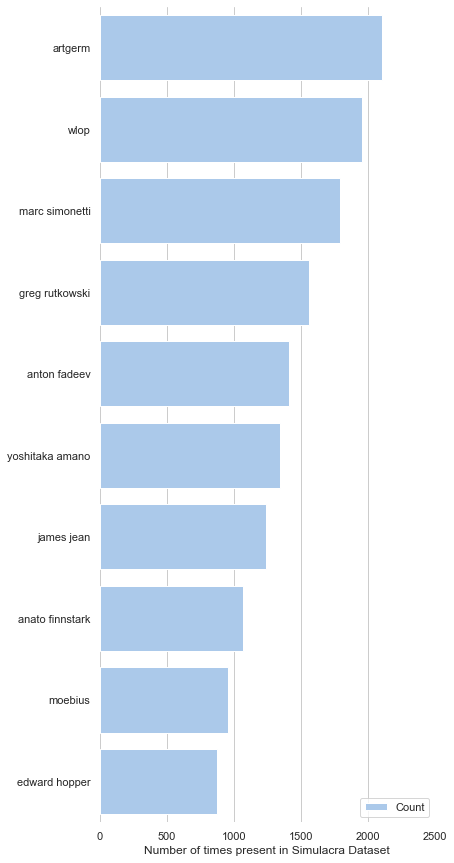

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="count", y="prompt", data=plot_df,
            label="Count", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 2500), ylabel="",
       xlabel="Number of times present in Simulacra Dataset")
sns.despine(left=True, bottom=True)

In [375]:
artist_df['tags'] = artist_df['tags'].str.replace('surrrealism', 'surrrealism')
artist_df['tags'] = artist_df['tags'].str.replace('symbolist', 'symbolism')
artist_df['tags'] = artist_df['tags'].str.replace('expressionist', 'expressionism')
artist_df['tags'] = artist_df['tags'].str.replace('illustrator', 'illustration')
artist_df['tags'] = artist_df['tags'].str.replace('impressionist', 'impressionism')
artist_df['tags'] = artist_df['tags'].str.replace('impressionis', 'impressionism')
#artist_df['tags'] = artist_df['tags'].str.replace('fi', 'figurativism')
artist_df['tags'] = artist_df['tags'].str.replace('figurative', 'figurativism')
artist_df['tags'] = artist_df['tags'].str.replace('landscapes', 'landscape')
artist_df['tags'] = artist_df['tags'].str.replace('landspape', 'landscape')
artist_df['tags'] = artist_df['tags'].str.replace('photographer', 'photography')
artist_df['tags'] = artist_df['tags'].str.replace('photograpy', 'photography')
artist_df['tags'] = artist_df['tags'].str.replace('scenes', 'scene')

artist_df['tags'] = artist_df['tags'].str.replace('-', ' ')
#artist_df['tags'] = artist_df['tags'].str.replace(' ,', '')

/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_45796/1075992919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_df['tags'] = artist_df['tags'].str.replace('surrrealism', 'surrrealism')
/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_45796/1075992919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_df['tags'] = artist_df['tags'].str.replace('symbolist', 'symbolism')
/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_45796/1075992919.py:3: SettingWithCopyWar

In [376]:
artist_df['tags'].unique()

array(['architecture, high contrast', 'vibrant, photography, scene',
       'scene, realism', 'surrealism, dark,', 'scene, photography',
       'abstract, angular', 'dark, installation, architecture, sculpture',
       'landscape, seascape, romanticism',
       'landscape, monochromatic, high contrast',
       'monochromatic, high contrast', 'detailed, clean',
       'monochromatic, scene', 'abstract, vibrant, landscape',
       'vibrant, landscape, digital', 'detailed, scene, renaissance',
       'abstract, low contrast', 'expressionism, messy, abstract, scene',
       'vibrant, stained glass, impressionismm',
       'vibrant, colorful, abstract, angular',
       'vibrant, abstract, collage', '', 'dark, landscape, romanticism',
       'high contrast, comics', 'textile, bauhaus',
       'bauhaus, high contrast', 'dark, messy, impressionismm',
       'comics, high contrast', 'photography, scene, portrait',
       'sculpture', 'messy, dark,', 'impressionismm, portrait, landscape',
      

In [400]:
# turn tags lists into a seperate column for each tag with 0, 1 presence indicator
from sklearn.feature_extraction.text import CountVectorizer

# keep only rows with tags in the tags column
tags_df = artist_df[artist_df['tags'] != ""]

def comma_tokenizer(text):
    return [token.strip() for token in text.split(',')]

bow_vec = CountVectorizer(binary = True, 
                         tokenizer = comma_tokenizer)

# show the vectorizer your data
bow_vec.fit(tags_df['tags'])

# check number of unique tags
len(bow_vec.get_feature_names_out())

# actually transform data using the vectoriser, save it into a pandas dataframe
bow_rep = pd.DataFrame(columns = bow_vec.get_feature_names_out(), data = bow_vec.transform(tags_df['tags']).todense())
bow_rep.head()

/Users/alecsharp/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,,3d,abstract,angular,anime,architecture,art deco,art nouveau,babies,baroque,...,streetscape,surrealism,surrrealism,symbolism,textile,textured,ukiyoe,vibrant,watercolor,whimsical
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [378]:
# '' is a token for some reason?
bow_rep = bow_rep.iloc[:, 1:]

array(['architecture, high contrast', 'vibrant, photography, scene',
       'scene, realism', 'surrealism, dark,', 'scene, photography',
       'abstract, angular', 'dark, installation, architecture, sculpture',
       'landscape, seascape, romanticism',
       'landscape, monochromatic, high contrast',
       'monochromatic, high contrast', 'detailed, clean',
       'monochromatic, scene', 'abstract, vibrant, landscape',
       'vibrant, landscape, digital', 'detailed, scene, renaissance',
       'abstract, low contrast', 'expressionism, messy, abstract, scene',
       'vibrant, stained glass, impressionismm',
       'vibrant, colorful, abstract, angular',
       'vibrant, abstract, collage', 'dark, landscape, romanticism',
       'high contrast, comics', 'textile, bauhaus',
       'bauhaus, high contrast', 'dark, messy, impressionismm',
       'comics, high contrast', 'photography, scene, portrait',
       'sculpture', 'messy, dark,', 'impressionismm, portrait, landscape',
       'ch

In [429]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(bow_rep.T, )





TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
# get frequency of tags appearing together, n grams?? no need any ordering

In [ ]:
# dict of all combos? plus one when theres a match?

In [589]:
a = np.array([1, 1, 0, 0])
b = np.array([1, 0, 1, 0])



,0,1,2,3,4,5,6,7,8,9,...,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203
comics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
dark,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
detailed,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
high contrast,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
impressionismm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
landscape,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
photography,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,1
portrait,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
scene,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0       0
1       0
2       0
3       0
4       0
       ..
1199    0
1200    0
1201    0
1202    0
1203    0
Name: comics, Length: 1204, dtype: int64

In [590]:
import numpy as np
from scipy.spatial.distance import pdist

def match_count(a, b):
    
    c = ((a + b) - 1) # check for both being present

    c[c == -1] = 0 # set all negative to 0

    return np.sum(c)

dm = pdist(plot_bow_rep.T, match_count)

In [592]:
dm.shape

(66,)

In [569]:
plot_bow_rep = bow_rep.loc[:, (bow_rep.sum() >= 100)]

In [676]:
from scipy.spatial import distance_matrix
style_differences = distance_matrix(bow_rep.T, bow_rep.T)

In [677]:
import networkx as nx
G = nx.from_numpy_matrix(style_differences)

In [678]:
bow_rep.T.sum()

0       2
1       3
2       2
3       2
4       2
       ..
1199    1
1200    1
1201    1
1202    3
1203    1
Length: 1204, dtype: int64

In [716]:
len(bow_rep.columns)

99

In [742]:
import matplotlib

matplotlib.rc_file_defaults()

def resize_node(node, check_node):
    if node == check_node:
        return 2200
    else:
        return 300

def plot_tags_graph(graph, bow_representation):
    
#     match_counts_list = [ for edge in edge in G.edges()]

    
    filtered_match_counts = []
    filtered_edges = []
    
#     print(len(G.edges()))

    all_combos = list(((x,y) for x in range(len(bow_representation.columns)) for y in range(len(bow_representation.columns))))
    
    for edge in all_combos:        
        
        m_count = match_count(bow_representation.iloc[:, edge[0]], bow_representation.iloc[:, edge[1]])
                
        if m_count > 4: 
        
            filtered_edges.append(edge)
        
            filtered_match_counts.append(m_count)
            
#     print(len(filtered_edges))
    
#     print(filtered_match_counts)

            
    #cols_of_interest list(bow_representation.sum().sort_values(ascending = False).index)
    
#     edges_exist = [edge for edge, match_count in zip(G.edges(), match_counts_list) if match_count > 0]
    
    #cols_of_interest = bow_representation.columns
    
#     plot_edges = [edge for _, edge in sorted(zip(filtered_match_counts, filtered_edges), key = lambda pair: pair[0])]
    
#     plot_matches = [match_count for match_count, _ in sorted(zip(filtered_match_counts, filtered_edges), key = lambda pair: pair[0])]
    

#     df = pd.DataFrame({
#         'edge': [edge[0] for edge in filtered_edges],
#         'match_count': filtered_match_counts
#     })
    
    
#     print(df.head())


    all_df = pd.DataFrame({
            'from_edge': [edge[0] for edge in filtered_edges],
            'to_edge' : [edge[1] for edge in filtered_edges],
            'match_count': filtered_match_counts
        })

    
    
    match_count_df = all_df.groupby('from_edge').sum().sort_values('match_count', ascending = False)
    
#     print(grouped_df)
    
#     edges_from = set([edge[0] for edge in edges_exist])
    
#     cols_of_interest = [col for idx, col in enumerate(cols_of_interest) if idx in edges_from]
    
#     cols_of_interest = [col for idx, col in enumerate(cols_of_interest) if idx in edges_from]
    
    side_len = int(np.ceil(np.sqrt(len(bow_representation.columns))))
    
    if side_len * (side_len - 1) >= len(bow_representation.columns):
        rows_len = side_len - 1
        col_len = side_len
    else:
        rows_len = side_len
        col_len = side_len
    
    #line_weights = [style_differences[edge] for edge in G.edges()]
    
    #pos_weights = (np.array(line_weights) - np.min(np.array(line_weights)))
    #line_weights_scaled = list(np.exp((1 - (pos_weights / np.max(pos_weights)))))
    
    rows_len = 10
    
    col_len = 3
    
    fig, axes = plt.subplots(rows_len, col_len, figsize = (16, 32))
    
    for ax, from_edge_id in zip(axes.flat, list(match_count_df.index)): # stops w cols in bow_representation 
        
        edges_of_interest = [edge for edge in filtered_edges if edge[0] == from_edge_id]
        counts_of_interest = [match_count / 4 for edge, match_count in zip(filtered_edges, filtered_match_counts) if edge[0] == from_edge_id]
        
            
        df = pd.DataFrame({
            'from_edge': [edge[0] for edge in edges_of_interest],
            'to_edge' : [edge[1] for edge in edges_of_interest],
            'match_count': counts_of_interest
        })
        
        df = df[df['from_edge'] != df['to_edge']]
        
#         print(df)


        G = nx.from_pandas_edgelist(df, source='from_edge', target='to_edge', edge_attr=True)
        
        
        all_nodes = set([edge for edge in list(df.from_edge)] + [edge for edge in list(df.to_edge)])
        
        labeldict = {node_id: bow_representation.columns[node_id] for node_id in all_nodes}
        
        
#       labeldict = dict(zip(G.nodes(), bow_representation.columns))

    
        #nodes_of_interest = [node for node in G.nodes() if node in ]

        #node_sizes = [resize_node(node, from_edge_id) for node in G.nodes()] # node_size = node_sizes, 
        
        
        #nx.draw_networkx(G, ax = ax, pos=nx.spring_layout(G),  nodelist = nodes_of_interest, edgelist = edges_of_interest, with_labels = True, node_color='r', edge_color='b')
        nx.draw_networkx(G, ax = ax, pos=nx.spring_layout(G), labels = labeldict, with_labels = True, width = counts_of_interest, node_color='r', edge_color='b')

        ax.set_title(f'{labeldict[from_edge_id]}')

    plt.tight_layout();

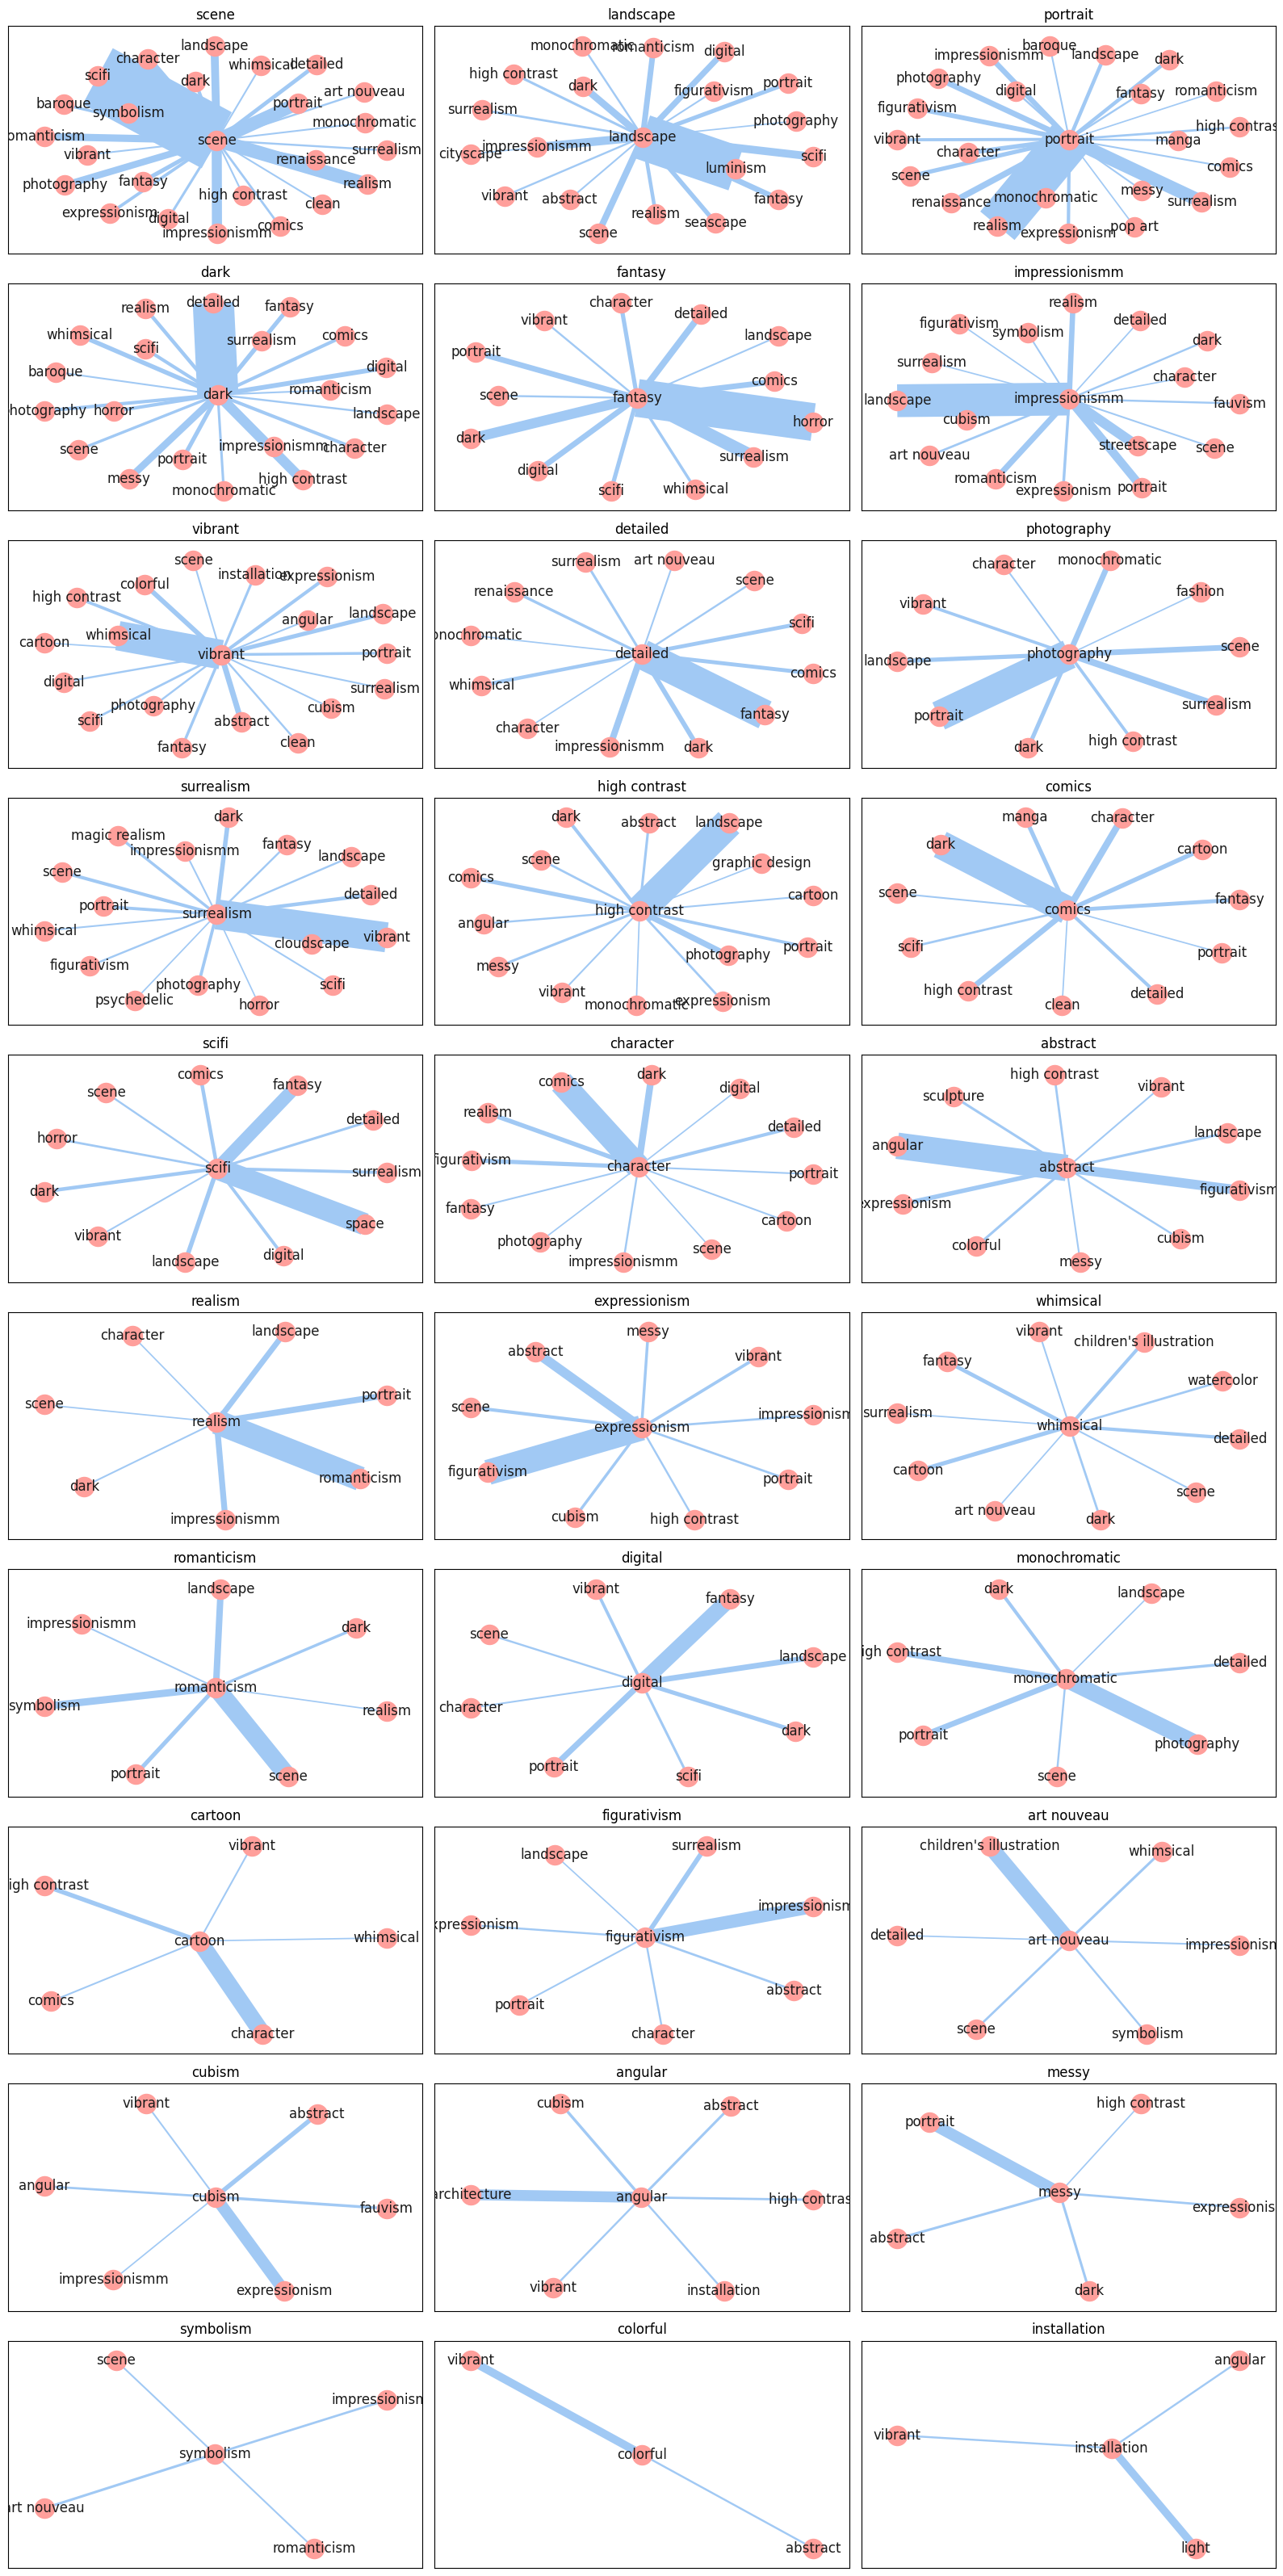

In [743]:
plot_tags_graph(G, bow_rep)

In [ ]:
bow_rep.sum().sort_values(ascending = False)[:25]

In [630]:
plot_bow_rep = bow_rep.loc[:, (bow_rep.sum() >= 42)]

In [413]:
len(plot_bow_rep.columns)

25

In [414]:
def plot_tags(x, y, bow_representation):
    
    #sns.set_theme(style="whitegrid")
    
    side_len = int(np.ceil(np.sqrt(len(bow_representation.columns))))
    
    if side_len * (side_len - 1) >= len(bow_representation.columns):
        rows_len = side_len - 1
        col_len = side_len
    else:
        rows_len = side_len
        col_len = side_len
        
    fig, axes = plt.subplots(rows_len, col_len, figsize = (16, 16))
    
    for ax, col in zip(axes.flat, bow_representation.columns): # stops w axis
        colour_list = list(bow_representation[col].map({0 : 'grey', 1: 'red'}))
        ax.scatter(x, y, c = colour_list, s = 0.5) # cmap = ['grey', 'red']
        ax.set_title(f'{col}')
        
    plt.tight_layout()

In [415]:
import pymde

pymde_emb = pymde.preserve_neighbors(bow_rep.values, embedding_dim=2, verbose=True).embed()

Jul 29 06:53:14 PM: Computing 6-nearest neighbors, with max_distance=None
Jul 29 06:53:14 PM: Exact nearest neighbors by brute force 
Jul 29 06:53:14 PM: Your dataset appears to contain duplicated items (rows); when embedding, you should typically have unique items.
Jul 29 06:53:14 PM: The following items have duplicates [   2    3    4    5    7    8    9   21   25   26   29   30   32   33
   36   37   41   43   46   61   63   67   75   76   80   85   86   88
   89   91   94   96   99  101  102  103  104  106  108  110  117  120
  121  124  127  132  135  137  140  141  144  145  147  148  158  160
  161  168  169  171  175  178  182  183  186  188  189  190  191  192
  195  200  204  205  206  207  211  213  214  215  216  217  220  221
  222  226  233  238  241  249  253  257  258  260  263  267  268  270
  272  273  279  282  284  285  292  296  298  299  302  305  306  309
  310  311  312  315  318  325  327  329  337  338  341  342  345  347
  348  350  351  352  355  357  362  3

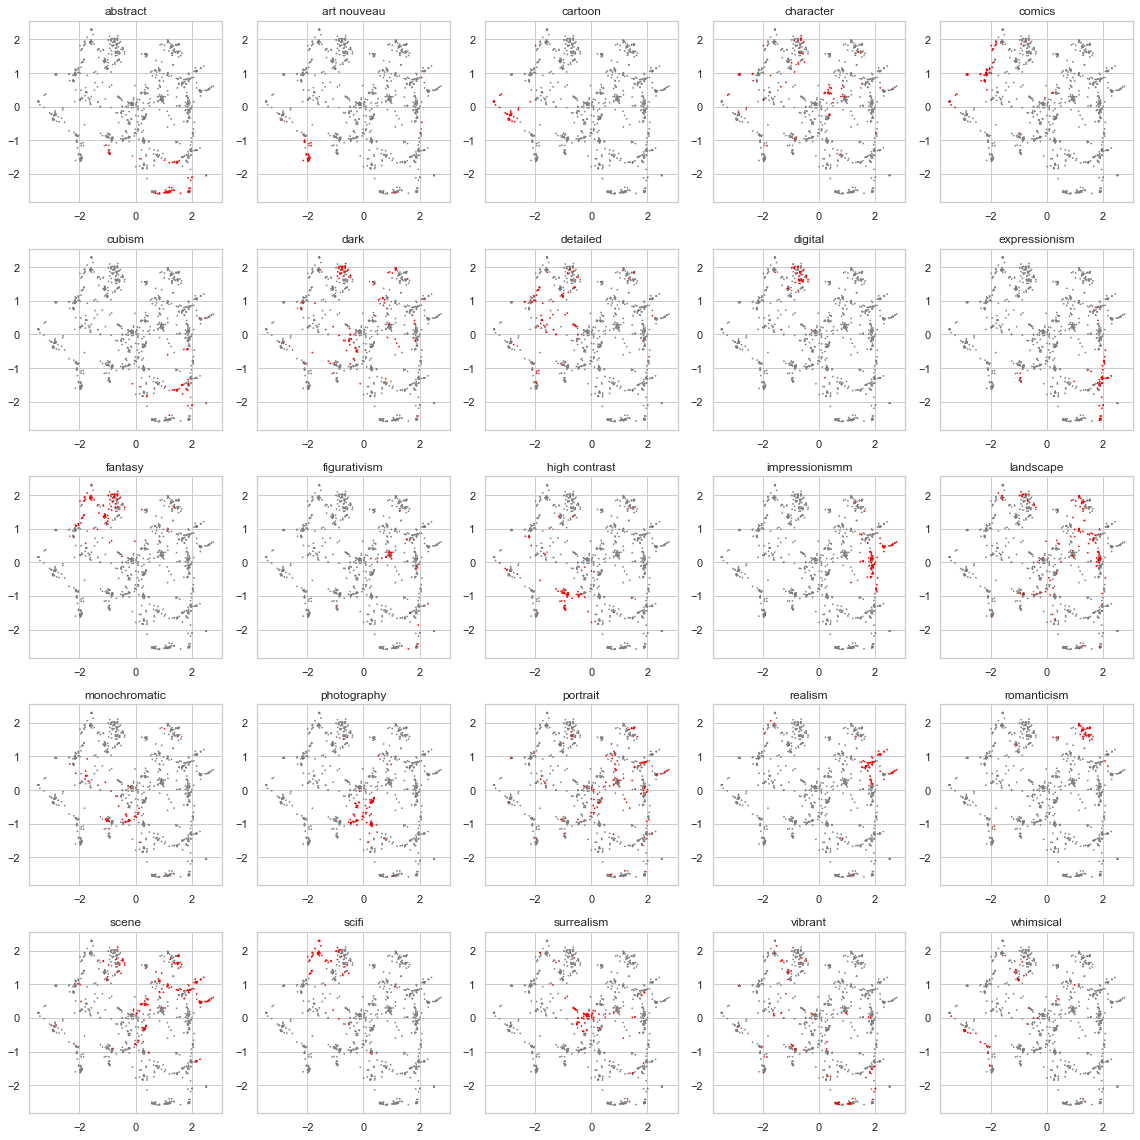

In [416]:
#plt.scatter(pymde_emb[:, 0], pymde_emb[:, 1])
plot_tags(pymde_emb[:, 0], pymde_emb[:, 1], plot_bow_rep)

In [417]:
from umap import UMAP

umap = UMAP().fit_transform(bow_rep)

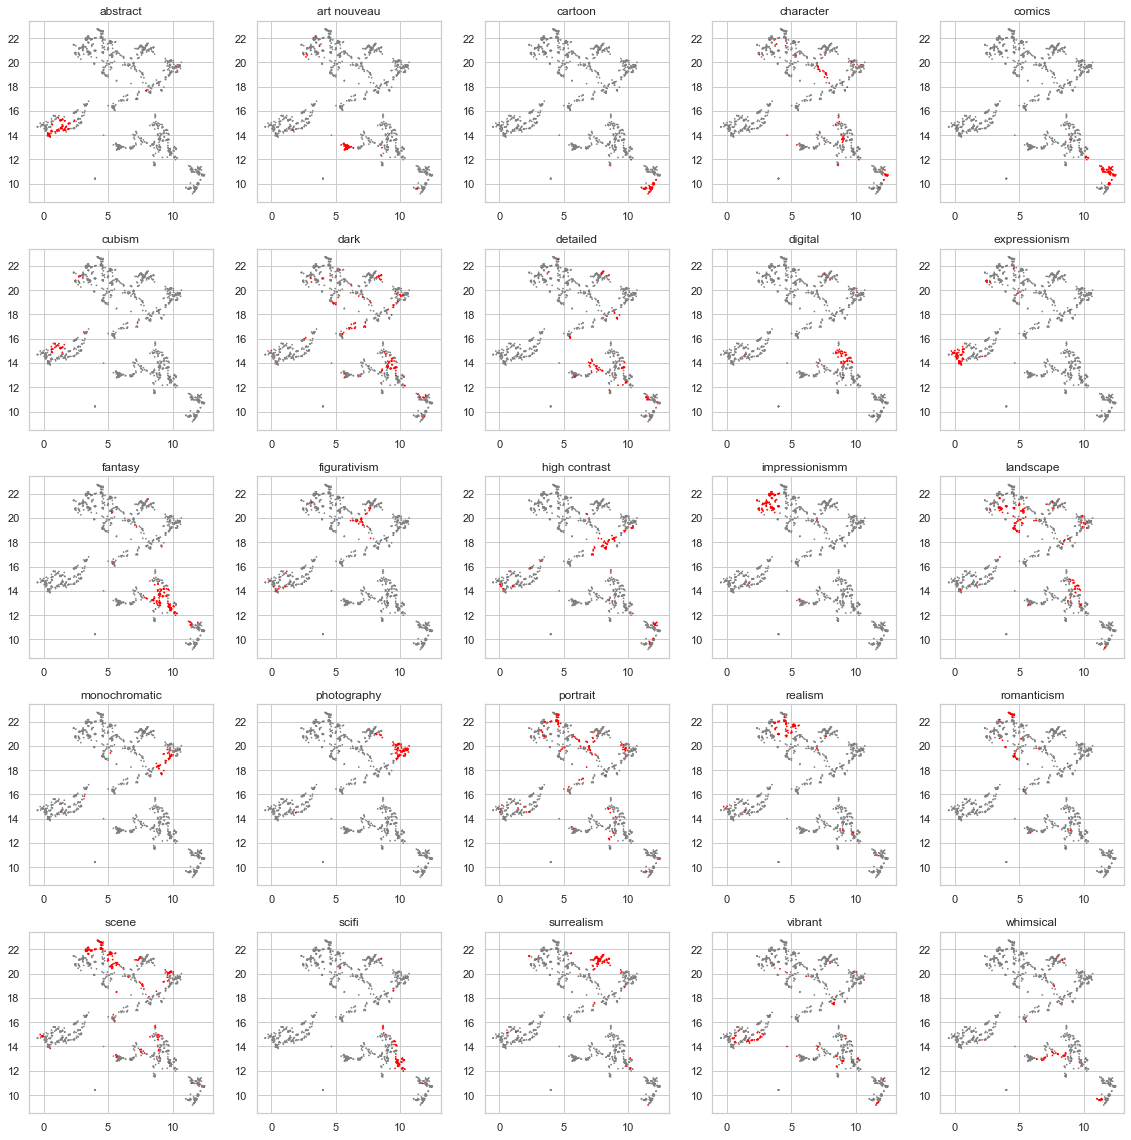

In [418]:
#plt.scatter(umap[:, 0], umap[:, 1])
plot_tags(umap[:, 0], umap[:, 1], plot_bow_rep)

In [419]:
# create and fit a 2d SVD
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(2)

svd.fit(bow_rep)

#spca.explained_variance_

# actually project only PC's
svds = svd.transform(bow_rep)

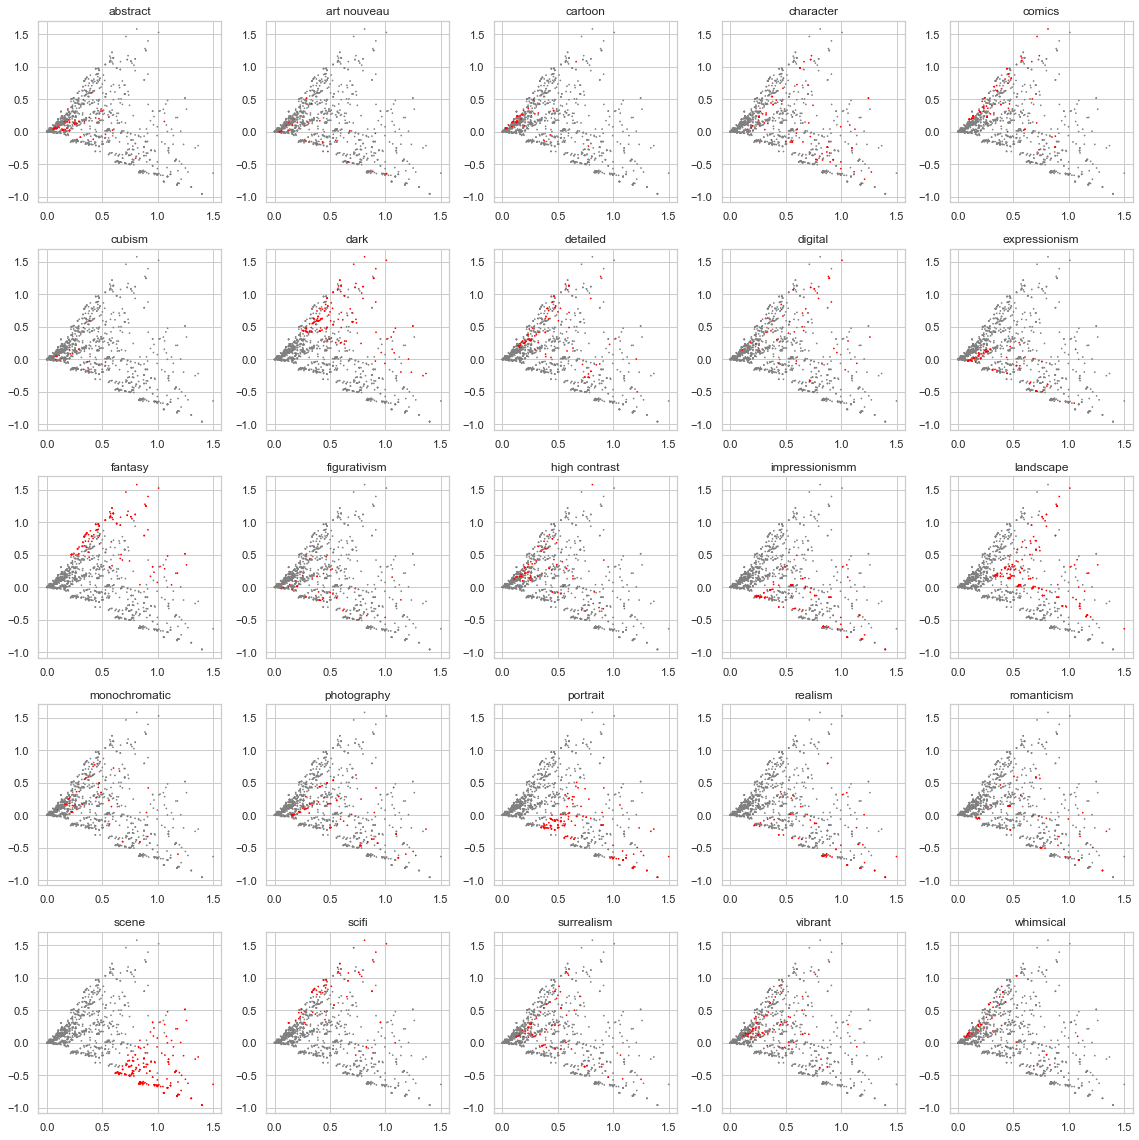

In [420]:
# plt.scatter(svds[:, 0], svds[:, 1])
plot_tags(svds[:, 0], svds[:, 1], plot_bow_rep)

In [421]:
# create and fit a 2d PCA
from sklearn.decomposition import SparsePCA

spca = SparsePCA(2)

spca.fit(bow_rep)

#spca.explained_variance_

# actually project only PC's
spcs = spca.transform(bow_rep)

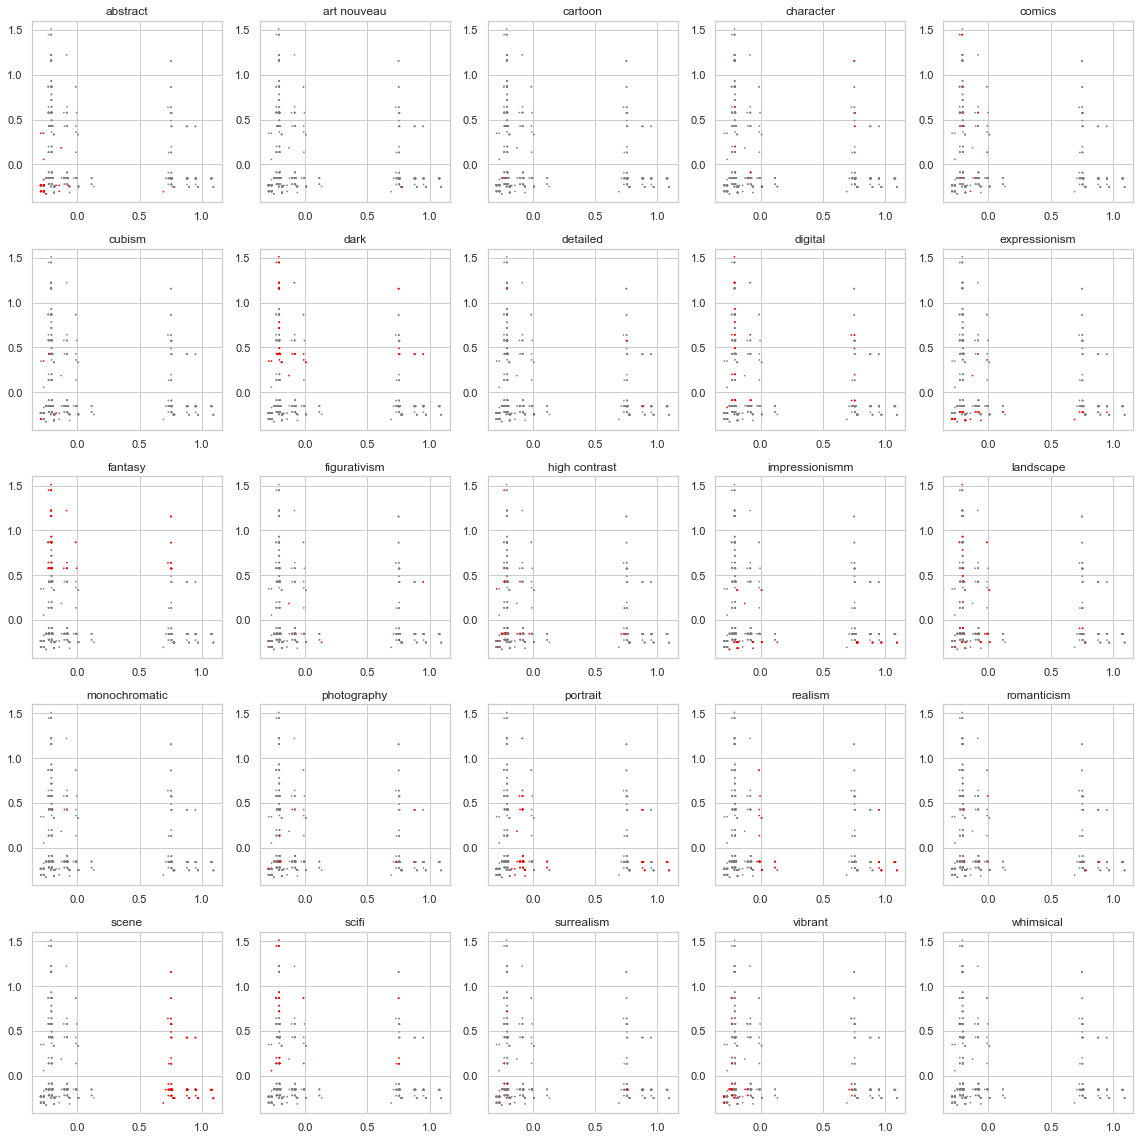

In [422]:
# plt.scatter(spcs[:, 0], spcs[:, 1])
plot_tags(spcs[:, 0], spcs[:, 1], plot_bow_rep)

In [423]:
# create and fit a 2d PCA
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(bow_rep)

pca.explained_variance_

# actually project only PC's
pcs = pca.transform(bow_rep)

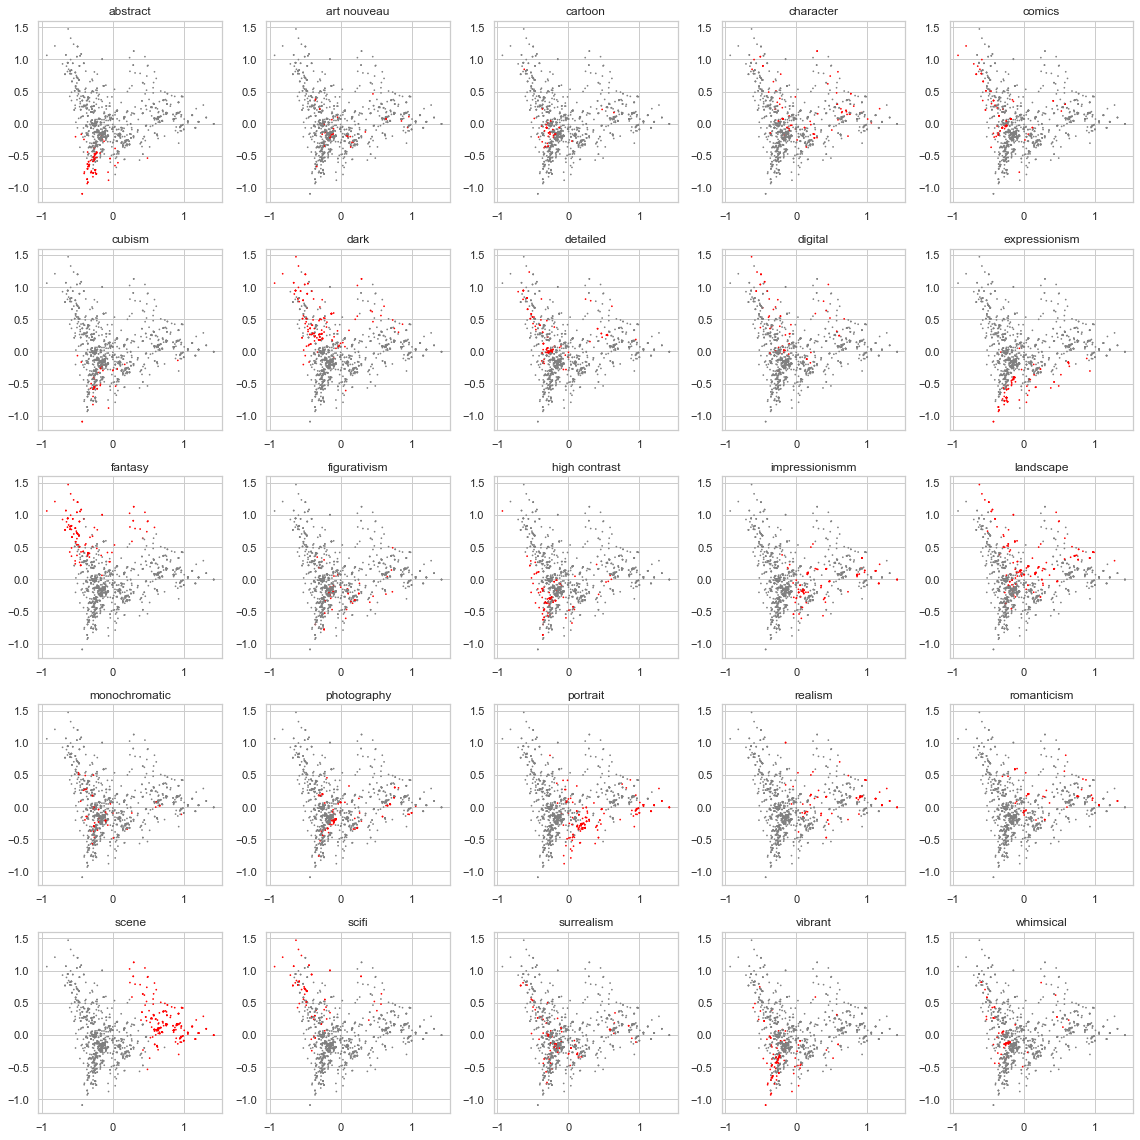

In [424]:
# plt.scatter(pcs[:, 0], pcs[:, 1])
plot_tags(pcs[:, 0], pcs[:, 1], plot_bow_rep)

In [394]:
# join bow representation
final_df = tags_df.reset_index(drop = True).join(bow_rep.reset_index(drop=True))
final_df

,l_name,f_name,style_represented,complete,tags,yod,user,style_or_effect,sgl_img_folder,cards_folder,...,streetscape,surrealism,surrrealism,symbolism,textile,textured,ukiyoe,vibrant,watercolor,whimsical
0,Aalto,Alvar,Yes,x,"architecture, high contrast",1976,sureailabs,-,x,x,...,0,0,0,0,0,0,0,0,0,0
1,Aarons,Slim,Yes,x,"vibrant, photography, scene",2006,sureailabs,-,x,x,...,0,0,0,0,0,0,0,1,0,0
2,Abbey,Edwin Austin,Yes,x,"scene, realism",1911,EErratica,-,x,x,...,0,0,0,0,0,0,0,0,0,0
3,Abercrombie,Gertrude,Yes,x,"surrealism, dark,",1977,sureailabs,-,x,x,...,0,1,0,0,0,0,0,0,0,0
4,Abramović,Marina,Yes,x,"scene, photography",,sureailabs,-,x,x,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,Sander,August,Yes,x,"photography,",1964,sureailabs,-,,,...,0,0,0,0,0,0,0,0,0,0
1200,Valtat,Louis,Yes,x,"fauvism,",1952,sureailabs,-,,,...,0,0,0,0,0,0,0,0,0,0
1201,Weems,Carrie Mae,Yes,x,"photography,",,sureailabs,-,,,...,0,0,0,0,0,0,0,0,0,0
1202,Nagel,Patrick,Yes,x,"high contrast, pop art, portrait",1984,sureailabs,-,,,...,0,0,0,0,0,0,0,0,0,0


In [395]:
final_df.shape

(1204, 115)

In [396]:
# join PCs representation
final_df = final_df.join(pd.DataFrame(pcs))

In [397]:
final_df

,l_name,f_name,style_represented,complete,tags,yod,user,style_or_effect,sgl_img_folder,cards_folder,...,surrrealism,symbolism,textile,textured,ukiyoe,vibrant,watercolor,whimsical,0,1
0,Aalto,Alvar,Yes,x,"architecture, high contrast",1976,sureailabs,-,x,x,...,0,0,0,0,0,0,0,0,-0.251185,-0.292149
1,Aarons,Slim,Yes,x,"vibrant, photography, scene",2006,sureailabs,-,x,x,...,0,0,0,0,0,1,0,0,0.593330,-0.153888
2,Abbey,Edwin Austin,Yes,x,"scene, realism",1911,EErratica,-,x,x,...,0,0,0,0,0,0,0,0,0.902019,0.144142
3,Abercrombie,Gertrude,Yes,x,"surrealism, dark,",1977,sureailabs,-,x,x,...,0,0,0,0,0,0,0,0,-0.462623,0.192402
4,Abramović,Marina,Yes,x,"scene, photography",,sureailabs,-,x,x,...,0,0,0,0,0,0,0,0,0.690496,0.028357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,Sander,August,Yes,x,"photography,",1964,sureailabs,-,,,...,0,0,0,0,0,0,0,0,-0.190259,-0.245419
1200,Valtat,Louis,Yes,x,"fauvism,",1952,sureailabs,-,,,...,0,0,0,0,0,0,0,0,-0.237997,-0.204870
1201,Weems,Carrie Mae,Yes,x,"photography,",,sureailabs,-,,,...,0,0,0,0,0,0,0,0,-0.190259,-0.245419
1202,Nagel,Patrick,Yes,x,"high contrast, pop art, portrait",1984,sureailabs,-,,,...,0,0,0,0,0,0,0,0,0.077290,-0.418365


In [268]:
final_df.to_csv("../raw_data/master_list_29_jul_w_counts.csv")